<a href="https://colab.research.google.com/github/smrnvdn/smrnvdn/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Carpov_courses__vebinar_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План :
## Задача
https://www.kaggle.com/c/mlcourse-dota2-win-prediction
## Код
## Бонус GAFAROV10


![sweaturl](https://acegif.com/wp-content/uploads/2020/b72nv6/partyparrt-37.gif "holy shit")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
pseudo_train = pd.read_csv('pseudo_train_df.csv')
pseudo_test = pd.read_csv('pseudo_test_df.csv')

In [ ]:
pseudo_train.shape

(29999, 247)

In [ ]:
pseudo_test.shape

(654, 280)

In [ ]:
pseudo_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Columns: 247 entries, match_id_hash to radiant_win
dtypes: float64(15), int64(231), object(1)
memory usage: 56.5+ MB


In [ ]:
pseudo_test

,match_id_hash,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,...,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed,radiant_win
0,7b806ddf6d6d616c10ae2089ffb8b5be,887,22,7,1,9,70,0,3,1,...,0,0,0,0,0,0,0,0,0,1
1,725ec4b525a20f3088842bea2a22132c,15,22,7,0,0,102,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,e36041c6f536ed0af8b3f9396a960f91,282,22,7,1,0,98,1,0,0,...,0,0,2,0,0,0,0,0,0,0
3,dcdb0cf951ca9601e3bfaca154e95e41,2573,5,0,22,2,107,3,17,13,...,0,0,9,0,0,3,0,0,0,0
4,a079655f92f64076c93876a36874eff0,443,4,0,3,5,10,1,0,1,...,0,0,3,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,2eeebcc853963794b01053ebe8bcb988,1213,4,0,4,66,48,1,4,0,...,0,0,0,0,0,0,0,0,3,0
650,1f1004b872984704bb0d7018d06bebb3,3415,22,0,23,10,86,7,8,17,...,0,0,14,0,0,2,1,1,0,1
651,87169e0052a98e224c6876840fe3c11e,2308,22,0,9,18,8,7,2,4,...,2,1,12,0,0,0,0,9,1,0
652,39a676bd4fd4753baeeccf5d18dee1ce,2576,22,7,18,0,111,3,6,7,...,5,2,11,0,0,2,0,4,9,1


In [ ]:
pseudo_train.describe()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed,radiant_win
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.00000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,1144.037868,19.634554,4.778826,6.515584,7.364345,50.963299,3.111670,3.249308,4.639855,6.29611,...,1.025534,0.339811,4.657489,0.091670,0.041368,0.298910,0.024834,1.281276,0.798360,0.526018
std,767.019605,6.249887,3.258060,6.493429,13.440356,34.558785,3.677295,3.267914,5.183135,8.19352,...,3.419258,0.948468,4.616371,0.288564,0.199143,0.730656,0.169170,2.621312,2.465113,0.499331
min,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,519.000000,22.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1040.000000,22.000000,7.000000,4.000000,3.000000,44.000000,2.000000,2.000000,3.000000,3.00000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1651.000000,22.000000,7.000000,10.000000,9.000000,81.000000,5.000000,5.000000,7.000000,9.00000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,4574.000000,23.000000,7.000000,43.000000,272.000000,120.000000,31.000000,25.000000,40.000000,84.00000,...,107.000000,29.000000,52.000000,1.000000,1.000000,8.000000,4.000000,26.000000,47.000000,1.000000


In [ ]:
pseudo_valid = pseudo_train.sample(999).reset_index(drop=True)
pseudo_train = pseudo_train[~pseudo_train.match_id_hash.isin(pseudo_valid.match_id_hash.unique())].reset_index(drop=True)

In [ ]:
X = pseudo_train.loc[:, (pseudo_train.columns != 'radiant_win') & (pseudo_train.columns != 'match_id_hash')]
y = pseudo_train.radiant_win
clf = LogisticRegressionCV(cv=5, random_state=42, n_jobs =-1 ,scoring = 'roc_auc').fit(X, y)

/home/s.gafarov/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf.score(X, y)

0.813366406926179

In [ ]:
X_valid = pseudo_valid.loc[:, (pseudo_valid.columns != 'radiant_win') & (pseudo_valid.columns != 'match_id_hash')]
y_valid_pred = clf.predict_proba(X_valid)


X_test = pseudo_test.loc[:, (pseudo_test.columns != 'radiant_win') & (pseudo_test.columns != 'match_id_hash')]
y_test_pred = clf.predict_proba(X_test)

In [ ]:
print('Validation score: ',roc_auc_score(pseudo_valid['radiant_win'], y_valid_pred[:,1]))
print('Test score: ',roc_auc_score(pseudo_test['radiant_win'], y_test_pred[:,1]))

Validation score:  0.8064973453175577
Test score:  0.7990269461077844


In [ ]:
# Работа с категориальными переменными

In [ ]:
pseudo_train.lobby_type.unique()

array([7, 0])

In [ ]:
categorical_features_list = [ x for x in pseudo_train.columns if x.endswith('hero_id')] + ['lobby_type']

In [ ]:
pseudo_train[categorical_features_list]

,r1_hero_id,r2_hero_id,r3_hero_id,r4_hero_id,r5_hero_id,d1_hero_id,d2_hero_id,d3_hero_id,d4_hero_id,d5_hero_id,lobby_type
0,11,78,14,59,77,12,21,60,84,34,7
1,15,96,27,63,89,58,14,1,56,92,0
2,14,99,101,26,41,18,98,8,69,86,7
3,42,69,27,104,65,23,22,35,72,1,7
4,57,10,81,98,119,48,68,60,102,8,7
...,...,...,...,...,...,...,...,...,...,...,...
28995,21,119,17,84,94,72,23,27,74,29,7
28996,101,49,45,40,35,44,32,99,91,41,7
28997,106,41,35,14,17,22,26,4,43,44,0
28998,32,120,30,48,74,14,21,8,11,16,7


In [ ]:
# One hot encoding
pd.get_dummies(pseudo_train['r1_hero_id'], drop_first=True)

,2,3,4,5,6,7,8,9,10,11,...,107,108,109,110,111,112,113,114,119,120
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


![sweaturl](https://media.tenor.com/images/acf3250be78c8fe6003afbe789985672/tenor.gif "holy shit")

In [ ]:
# Mean Encoding
for col in categorical_features_list:
    means_map = pseudo_train.groupby(col).radiant_win.mean()
    pseudo_train[col+'_mean_enc'] = pseudo_train[col].map(means_map)
    # Don't forget about validation dataset
    pseudo_valid[col+'_mean_enc'] =  pseudo_valid[col].map(means_map)
    # and test dataset 
    pseudo_test[col+'_mean_enc'] =  pseudo_test[col].map(means_map)

In [ ]:
me_list = [ x for x in pseudo_train.columns if x.endswith('_mean_enc')]

In [ ]:
pseudo_train[me_list]

,r1_hero_id_mean_enc,r2_hero_id_mean_enc,r3_hero_id_mean_enc,r4_hero_id_mean_enc,r5_hero_id_mean_enc,d1_hero_id_mean_enc,d2_hero_id_mean_enc,d3_hero_id_mean_enc,d4_hero_id_mean_enc,d5_hero_id_mean_enc,lobby_type_mean_enc
0,0.475108,0.585106,0.536323,0.519737,0.544118,0.552846,0.517564,0.508772,0.511719,0.551181,0.526813
1,0.382609,0.537815,0.560096,0.527919,0.527778,0.584906,0.528090,0.554717,0.505455,0.472727,0.524688
2,0.526758,0.516129,0.606272,0.480000,0.562887,0.542169,0.594595,0.500768,0.594340,0.559653,0.526813
3,0.583153,0.521127,0.560096,0.544413,0.439394,0.544271,0.402299,0.541586,0.542056,0.596296,0.526813
4,0.554054,0.489209,0.586854,0.424051,0.579439,0.479866,0.502041,0.508772,0.426829,0.540193,0.526813
...,...,...,...,...,...,...,...,...,...,...,...
28995,0.492574,0.507082,0.538168,0.522556,0.433333,0.554167,0.551724,0.498856,0.537068,0.515924,0.526813
28996,0.564356,0.558065,0.538462,0.530405,0.510092,0.544379,0.436856,0.463768,0.600000,0.542857,0.526813
28997,0.451282,0.491870,0.517647,0.535144,0.478261,0.477435,0.530612,0.521531,0.539683,0.553030,0.524688
28998,0.569817,0.493056,0.550000,0.545455,0.514440,0.540765,0.517564,0.500768,0.560714,0.567568,0.526813


In [ ]:
X_mean = pseudo_train.loc[:, 
                     ~pseudo_train.columns.isin(categorical_features_list +['radiant_win','match_id_hash'])]
y_mean = pseudo_train.radiant_win
clf_mean = LogisticRegressionCV(cv=5, random_state=42, n_jobs =-1, scoring = 'roc_auc').fit(X_mean, y_mean)

/home/s.gafarov/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf_mean.score(X_mean,y_mean)

0.813015259450802

In [ ]:
X_valid_mean = pseudo_valid.loc[:, 
                     ~pseudo_valid.columns.isin(categorical_features_list +['radiant_win','match_id_hash'])]
y_valid_pred_mean = clf_mean.predict_proba(X_valid_mean)


X_test_mean = pseudo_test.loc[:, 
                     ~pseudo_test.columns.isin(categorical_features_list +['radiant_win','match_id_hash'])]
y_test_pred_mean = clf_mean.predict_proba(X_test_mean)

In [ ]:
print('Validation score: ',roc_auc_score(pseudo_valid['radiant_win'], y_valid_pred_mean[:,1]))
print('Test score: ',roc_auc_score(pseudo_test['radiant_win'], y_test_pred_mean[:,1]))

Validation score:  0.8064732483513659
Test score:  0.7992889221556886


In [ ]:
# Smoothed means

In [ ]:
for col in categorical_features_list:
    agg = pseudo_train.groupby(col).radiant_win.agg(['count','mean'])
    counts = agg['count']
    means = agg['mean']
    weight = 100
    smooth = (counts * means + weight * means) / (counts + weight)
    smooth_s = pseudo_train[col].map(smooth)
    pseudo_train[col+'_s_mean_enc'] = smooth_s
    # Don't forget about validation dataset
    pseudo_valid[col+'_s_mean_enc'] =  pseudo_valid[col].map(smooth)
    # and test dataset 
    pseudo_test[col+'_s_mean_enc'] =  pseudo_test[col].map(smooth)

In [ ]:
sme_list = [ x for x in pseudo_train.columns if x.endswith('_s_mean_enc')]

In [ ]:
pseudo_train[sme_list]

,r1_hero_id_s_mean_enc,r2_hero_id_s_mean_enc,r3_hero_id_s_mean_enc,r4_hero_id_s_mean_enc,r5_hero_id_s_mean_enc,d1_hero_id_s_mean_enc,d2_hero_id_s_mean_enc,d3_hero_id_s_mean_enc,d4_hero_id_s_mean_enc,d5_hero_id_s_mean_enc,lobby_type_s_mean_enc
0,0.475108,0.585106,0.536323,0.519737,0.544118,0.552846,0.517564,0.508772,0.511719,0.551181,0.526813
1,0.382609,0.537815,0.560096,0.527919,0.527778,0.584906,0.528090,0.554717,0.505455,0.472727,0.524688
2,0.526758,0.516129,0.606272,0.480000,0.562887,0.542169,0.594595,0.500768,0.594340,0.559653,0.526813
3,0.583153,0.521127,0.560096,0.544413,0.439394,0.544271,0.402299,0.541586,0.542056,0.596296,0.526813
4,0.554054,0.489209,0.586854,0.424051,0.579439,0.479866,0.502041,0.508772,0.426829,0.540193,0.526813
...,...,...,...,...,...,...,...,...,...,...,...
28995,0.492574,0.507082,0.538168,0.522556,0.433333,0.554167,0.551724,0.498856,0.537068,0.515924,0.526813
28996,0.564356,0.558065,0.538462,0.530405,0.510092,0.544379,0.436856,0.463768,0.600000,0.542857,0.526813
28997,0.451282,0.491870,0.517647,0.535144,0.478261,0.477435,0.530612,0.521531,0.539683,0.553030,0.524688
28998,0.569817,0.493056,0.550000,0.545455,0.514440,0.540765,0.517564,0.500768,0.560714,0.567568,0.526813


In [ ]:
X_sm = pseudo_train.loc[:, 
                     ~pseudo_train.columns.isin(categorical_features_list +
                                                ['radiant_win','match_id_hash'] + me_list)]
y_sm = pseudo_train.radiant_win
clf_sm = LogisticRegressionCV(cv=5, random_state=42, n_jobs =-1, scoring = 'roc_auc').fit(X_sm, y_sm)

/home/s.gafarov/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf_sm.score(X_sm,y_sm)

0.8133197078071

In [ ]:
X_valid_sm = pseudo_valid.loc[:, 
                     ~pseudo_valid.columns.isin(categorical_features_list +['radiant_win','match_id_hash']
                                               + me_list)]
y_valid_pred_sm = clf_sm.predict_proba(X_valid_sm)


X_test_sm = pseudo_test.loc[:, 
                     ~pseudo_test.columns.isin(categorical_features_list +['radiant_win','match_id_hash']
                                              + me_list)]
y_test_pred_sm = clf_sm.predict_proba(X_test_sm)

In [ ]:
print('Validation score: ',roc_auc_score(pseudo_valid['radiant_win'], y_valid_pred_sm[:,1]))
print('Test score: ',roc_auc_score(pseudo_test['radiant_win'], y_test_pred_sm[:,1]))

Validation score:  0.8067182341743174
Test score:  0.801375374251497


In [ ]:
# WOE 

\begin{equation}
WOE =(ln(\frac{GoodDistr}{BadDistr}))* 100
\end{equation}

In [ ]:
for col in categorical_features_list:
    agg = pseudo_train.groupby(col).radiant_win.mean()
    woe_df = pd.DataFrame(agg).rename(columns={'radiant_win':"WOE_Good"})
    woe_df['WOE_Bad'] = 1 - woe_df['WOE_Good']
    woe_df['WOE_Bad'] = np.where(woe_df['WOE_Bad'] == 0, 0.00001, woe_df['WOE_Bad'])
    woe_df['woe'] = np.log(woe_df.WOE_Good/woe_df.WOE_Bad)

    woe = pseudo_train[col].map(woe_df['woe'])
    pseudo_train[col+'_woe'] = woe
    
    # Don't forget about validation dataset
    pseudo_valid[col+'_woe'] =  pseudo_valid[col].map(woe_df['woe'])
    # and test dataset 
    pseudo_test[col+'_woe'] =  pseudo_test[col].map(woe_df['woe'])

In [ ]:
woe_list = [ x for x in pseudo_train.columns if x.endswith('_woe')]

In [ ]:
pseudo_train[woe_list]

,r1_hero_id_woe,r2_hero_id_woe,r3_hero_id_woe,r4_hero_id_woe,r5_hero_id_woe,d1_hero_id_woe,d2_hero_id_woe,d3_hero_id_woe,d4_hero_id_woe,d5_hero_id_woe,lobby_type_woe
0,-0.099649,0.343772,0.145548,0.078988,0.176931,0.212175,0.070287,0.035091,0.046884,0.205444,0.107356
1,-0.478490,0.151550,0.241552,0.111791,0.111226,0.342945,0.112478,0.219748,0.021819,-0.109199,0.098832
2,0.107136,0.064539,0.431667,-0.080043,0.252886,0.169076,0.382992,0.003072,0.381935,0.239754,0.107356
3,0.335732,0.084557,0.241552,0.178120,-0.243622,0.177548,-0.395896,0.166729,0.168623,0.390056,0.107356
4,0.217065,-0.043172,0.350977,-0.306167,0.320472,-0.080580,0.008163,0.035091,-0.294800,0.161119,0.107356
...,...,...,...,...,...,...,...,...,...,...,...
28995,-0.029705,0.028331,0.152969,0.090287,-0.268264,0.217520,0.207639,-0.004577,0.148543,0.063716,0.107356
28996,0.258862,0.233311,0.154151,0.121772,0.040372,0.177983,-0.253933,-0.145182,0.405465,0.171850,0.107356
28997,-0.195492,-0.032523,0.070618,0.140807,-0.087011,-0.090323,0.122602,0.086178,0.159065,0.212922,0.098832
28998,0.281103,-0.027780,0.200671,0.182322,0.057778,0.163424,0.070287,0.003072,0.244061,0.271934,0.107356


In [ ]:
X_woe = pseudo_train.loc[:, 
                     ~pseudo_train.columns.isin(categorical_features_list +
                                                ['radiant_win','match_id_hash'] + me_list + sme_list)]
y_woe = pseudo_train.radiant_win
clf_woe = LogisticRegressionCV(cv=5, random_state=42, n_jobs =-1, scoring = 'roc_auc').fit(X_woe, y_woe)

/home/s.gafarov/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf_woe.score(X_woe,y_woe)

0.8138006256488719

In [ ]:
X_valid_woe = pseudo_valid.loc[:, 
                     ~pseudo_valid.columns.isin(categorical_features_list +['radiant_win','match_id_hash']
                                               + me_list + sme_list)]
y_valid_pred_woe = clf_woe.predict_proba(X_valid_woe)


X_test_woe = pseudo_test.loc[:, 
                     ~pseudo_test.columns.isin(categorical_features_list +['radiant_win','match_id_hash']
                                              + me_list + sme_list)]
y_test_pred_woe = clf_woe.predict_proba(X_test_woe)

In [ ]:
print('Validation score: ',roc_auc_score(pseudo_valid['radiant_win'], y_valid_pred_woe[:,1]))
print('Test score: ',roc_auc_score(pseudo_test['radiant_win'], y_test_pred_woe[:,1]))

Validation score:  0.8079953733824911
Test score:  0.8012818113772455


In [ ]:
# Expanding mean

In [ ]:
for col in categorical_features_list:
    cumsum = pseudo_train.groupby(col).radiant_win.cumsum() - pseudo_train['radiant_win']
    cumcnt = pseudo_train.groupby(col).cumcount() + 1
    exp_mean = cumsum/cumcnt
    pseudo_train[col+ '_exp_mean'] = exp_mean

In [ ]:
exp_mean_list = [ x for x in pseudo_train.columns if x.endswith('_exp_mean')]

In [ ]:
pseudo_train[exp_mean_list]

,r1_hero_id_exp_mean,r2_hero_id_exp_mean,r3_hero_id_exp_mean,r4_hero_id_exp_mean,r5_hero_id_exp_mean,d1_hero_id_exp_mean,d2_hero_id_exp_mean,d3_hero_id_exp_mean,d4_hero_id_exp_mean,d5_hero_id_exp_mean,lobby_type_exp_mean
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...
28995,0.520661,0.500000,0.540670,0.492135,0.578947,0.474063,0.518095,0.518519,0.523238,0.522523,0.527013
28996,0.495074,0.511429,0.540541,0.535316,0.430464,0.559322,0.562025,0.490698,0.534653,0.516129,0.527037
28997,0.448980,0.491903,0.512922,0.535200,0.472656,0.472019,0.532164,0.509524,0.535433,0.550864,0.523779
28998,0.569848,0.486395,0.555819,0.550523,0.518116,0.542714,0.516129,0.493808,0.557945,0.560000,0.527010



<img src="https://habrastorage.org/files/040/6ca/59e/0406ca59e7c243e1bffae413d1d40947.png" width="600" height="300">


In [ ]:
# Simple stacking
new_validation_df = pseudo_valid[['match_id_hash','radiant_win']]
new_validation_df.loc[:,'le_pred'] = y_valid_pred[:, 1]
new_validation_df.loc[:,'me_pred'] = y_valid_pred_mean[:, 1]
new_validation_df.loc[:,'sme_pred'] = y_valid_pred_sm[:, 1]
new_validation_df.loc[:,'woe_pred'] = y_valid_pred_woe[:, 1]

new_test_df = pseudo_test[['match_id_hash','radiant_win']]
new_test_df.loc[:,'le_pred'] = y_test_pred[:, 1]
new_test_df.loc[:,'me_pred'] = y_test_pred_mean[:, 1]
new_test_df.loc[:,'sme_pred'] = y_test_pred_sm[:, 1]
new_test_df.loc[:,'woe_pred'] = y_test_pred_woe[:, 1]

/home/s.gafarov/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/s.gafarov/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
X_meta = new_validation_df.loc[:, 
                     ~new_validation_df.columns.isin(['radiant_win', 'match_id_hash'])]
y_meta = new_validation_df.radiant_win
clf_meta = LogisticRegressionCV(cv=5, random_state=42, n_jobs =-1, scoring = 'roc_auc').fit(X_meta, y_meta)

In [ ]:
clf_meta.score(X_meta,y_meta)

0.8082885531378265

In [ ]:
X_test_meta = new_test_df.loc[:, 
                     ~new_test_df.columns.isin(['radiant_win','match_id_hash'])]
y_test_meta = clf_meta.predict_proba(X_test_meta)

In [ ]:
print('Test score: ',roc_auc_score(pseudo_test['radiant_win'], y_test_meta[:,1]))

Test score:  0.8027039670658682


![image.png](attachment:b8d1daab-8248-4761-850d-f108a5a432cc.png)


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="800" height="400">


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
train = pd.read_csv('pseudo_train_df.csv')
test = pd.read_csv('pseudo_test_df.csv')

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
train_new = pd.DataFrame()

X_ = train.loc[:,
               ~train.columns.isin(['radiant_win','match_id_hash'])]

y_ = train.radiant_win

for tr_ind, val_ind in skf.split(X_,y_):
    cv_trian , cv_valid = train.loc[tr_ind], train.loc[val_ind]
    X_test = test.copy()
    # Mean Encoding
    for col in categorical_features_list:
        means_map = cv_trian.groupby(col).radiant_win.mean()
        # Don't forget about validation dataset
        cv_valid[col + '_mean_enc'] =  cv_valid[col].map(means_map)
        # and test dataset 
        X_test[col+'_mean_enc'] =  X_test[col].map(means_map)
    train_new = pd.concat([train_new,cv_valid])
    
    #your code here
    

In [ ]:
train.shape

(29999, 247)

In [ ]:
train_new.shape

(29999, 258)

In [ ]:
train_new

,match_id_hash,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,...,r2_hero_id_mean_enc,r3_hero_id_mean_enc,r4_hero_id_mean_enc,r5_hero_id_mean_enc,d1_hero_id_mean_enc,d2_hero_id_mean_enc,d3_hero_id_mean_enc,d4_hero_id_mean_enc,d5_hero_id_mean_enc,lobby_type_mean_enc
3,b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,...,0.497207,0.587021,0.535461,0.442308,0.528302,0.396610,0.548694,0.558140,0.621622,0.527060
4,19c39fe2af2b547e48708ca005c6ae74,160,22,7,0,0,57,0,0,0,...,0.500000,0.588889,0.458647,0.589431,0.468504,0.523364,0.529412,0.427481,0.552326,0.527060
13,ab3cc6ccac661a1385e73a2e9f21313a,721,4,0,2,1,30,2,2,1,...,0.548837,0.488152,0.498645,0.482540,0.568182,0.465217,0.565217,0.474227,0.527157,0.523810
15,34c81a8faede0d8f1f87dcc6ee824658,1362,4,0,6,4,39,1,1,4,...,0.479730,0.566667,0.574879,0.505618,0.492308,0.542986,0.556452,0.578035,0.553191,0.523810
16,5feece770ca79e5e8cd8052198b3f533,2388,4,0,16,10,103,9,8,18,...,0.492268,0.513812,0.574074,0.554386,0.524510,0.530387,0.514286,0.471390,0.518182,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29973,b3816a237a4ab69585cfc464194d0a39,1683,22,0,7,0,22,9,3,7,...,0.452489,0.517094,0.547151,0.564220,0.591667,0.583333,0.644737,0.525847,0.522059,0.525671
29982,676f0d3a2e2724336dabc96c78324a2f,2263,22,7,21,0,119,6,9,18,...,0.517007,0.486034,0.519841,0.560748,0.474104,0.523810,0.562500,0.606618,0.508091,0.526152
29985,1d6fc47e76dedb38169282edfe96b20b,518,2,7,1,0,95,0,0,0,...,0.502075,0.537037,0.555556,0.497297,0.519553,0.636364,0.436937,0.471154,0.627530,0.526152
29997,af3bd887e502915daaab9545f8294af3,62,22,7,0,4,32,0,0,0,...,0.486957,0.568966,0.530612,0.509890,0.543347,0.513661,0.491396,0.557664,0.570370,0.526152


<img src="4.png" width="800" height="400">

<img src="5.png" width="800" height="400">

## Stacking здорово человека

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.823 (0.047)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.963 (0.021)


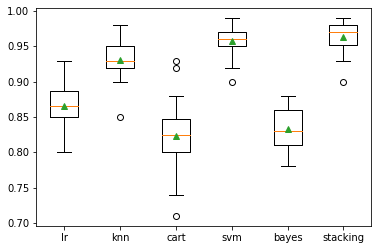

In [ ]:
#from https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<img src="3.png" width="600" height="300">

### Полезные ссылки
https://www.coursera.org/lecture/competitive-data-science/regularization-LGYQ2
https://www.coursera.org/specializations/aml
https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
https://www.coursera.org/lecture/competitive-data-science/stacknet-s8RLi
